# Python Bootcamp Project 24-25: Customer Segmentation

In [29]:
from itertools import product

# allows for multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
from scipy.stats import alpha

InteractiveShell.ast_node_interactivity = "all"

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

1. Revenue Contribution Analysis: Identifying products or categories
contributing the most to overall revenue.
2. Product Segmentation: Grouping products based on sales volume,
revenue, and daily sales trends.
3. Customer Purchase Patterns: Segmenting customers based on or-
der frequency and total spending.
4. Daily Sales Trends: Analyzing daily sales data to identify peak pe-
riods and consistent performers.
3
5. Order Behavior Analysis: Examining the distribution and frequency
of total orders per product.
6. Marketing Campaign Effectiveness: Using cluster insights to rec-
ommend promotional strategies for different segments

## Data Import

In [31]:
df = pd.read_excel('Online Retail.xlsx')
print('******************************************** COLUMNS OF DATASET *****************************************************')
df.columns
print('******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************')
df.head()
print('******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************')
df.tail()
print('******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************')
df.info()
print('************************************************ DESCRIPTION OF DATA  **********************************************')
df.describe()


******************************************** COLUMNS OF DATASET *****************************************************


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
************************************************ DESCRIPTION OF DATA  **********************************************


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [32]:
num_rows = len(df)
num_cols = len(df.columns)
print(f'Number of rows are {num_rows}, and number of columns are {num_cols}.')
column_names = df.columns.tolist()
column_names

Number of rows are 541909, and number of columns are 8.


['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

## Data Cleaning

In [33]:
df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [34]:
df.duplicated().sum()

np.int64(5268)

In [35]:
df.drop_duplicates(keep=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [36]:
# Remove rows with negative or zero Quantity or UnitPrice
df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [37]:
# Check for null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [38]:
# Drop rows with missing values in relevant fields
df.dropna(subset=['CustomerID', 'Description'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Revenue Contribution Analysis: 
### Identifying to 20 products contributing the most to overall revenue.

In [39]:
#calculating revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [40]:
# Group by StockCode and Description to calculate total revenue
revenue_per_product = df.groupby(['StockCode','Description'])['Revenue'].sum().reset_index()
# Sort by revenue in descending order
revenue_per_product = revenue_per_product.sort_values(by='Revenue', ascending=False)
# Display the top contributors
revenue_per_product

,StockCode,Description,Revenue
4780,DOT,DOTCOM POSTAGE,206245.480
1464,22423,REGENCY CAKESTAND 3 TIER,164762.190
3045,47566,PARTY BUNTING,98302.980
4373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,97715.990
4360,85099B,JUMBO BAG RED RETROSPOT,92356.030
...,...,...,...
4764,BANK CHARGES,Bank Charges,-7175.639
4766,CRUK,CRUK Commission,-7933.430
4763,B,Adjust bad debt,-11062.060
4781,M,Manual,-68674.190


### Total revenue contribution 

In [41]:
#total revenue
total_revenue_contributor = revenue_per_product.sort_values(by = 'Revenue', ascending=False)

# Calculate Cumulative Revenue and Cumulative Percentage
total_revenue_contributor['Cumulative Revenue'] = total_revenue_contributor['Revenue'].cumsum()
total_revenue = total_revenue_contributor['Revenue'].sum()
total_revenue_contributor['Cumulative %'] = (total_revenue_contributor['Cumulative Revenue'] / total_revenue) * 100



<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='None', ylabel='Revenue'>

Text(0.5, 1.0, 'Revenue Distribution')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Revenue')

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

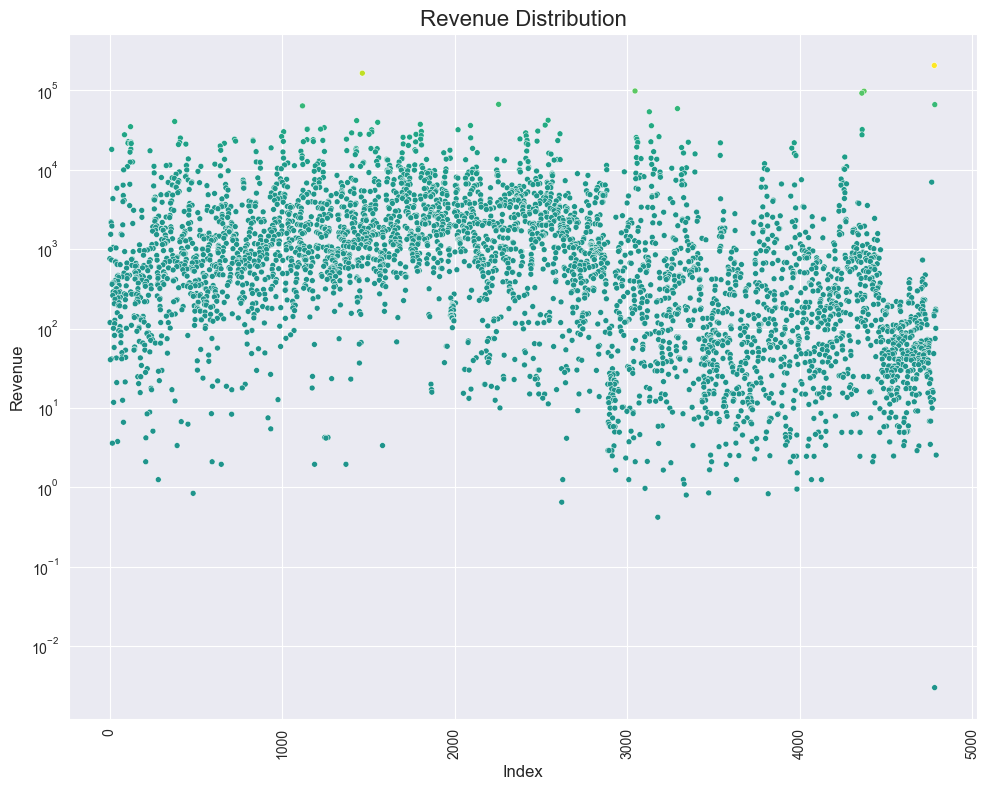

In [42]:
# scatterplot of total revenue
plt.figure(figsize=(10,8))
# Create scatter plot with customized parameters
sns.scatterplot(x=total_revenue_contributor.index, y=total_revenue_contributor['Revenue'], hue=total_revenue_contributor['Revenue'], palette='viridis', size=30, legend=None)

# Set title and labels
plt.title('Revenue Distribution', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.yscale('log') # Use log scale for Y-axis to make large revenue values more defined
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Pareto Chart to Highlight Top 20 Contributors

In [43]:
# Sort by revenue in descending order and select the top 20 products

top_20_contributors = revenue_per_product.sort_values(by='Revenue', ascending=False).head(20)

# Calculate Cumulative Revenue and Cumulative Percentage
top_20_contributors['Cumulative Revenue'] = top_20_contributors['Revenue'].cumsum()
total_revenue = top_20_contributors['Revenue'].sum()
print(f"Total Revenue: {total_revenue}")


top_20_contributors['Cumulative %'] = (top_20_contributors['Cumulative Revenue'] / total_revenue) * 100
print(top_20_contributors[['Description', 'Revenue', 'Cumulative %']])


top_20_contributors

Total Revenue: 1347612.03
                             Description    Revenue  Cumulative %
4780                      DOTCOM POSTAGE  206245.48     15.304515
1464            REGENCY CAKESTAND 3 TIER  164762.19     27.530748
3045                       PARTY BUNTING   98302.98     34.825353
4373  WHITE HANGING HEART T-LIGHT HOLDER   97715.99     42.076401
4360             JUMBO BAG RED RETROSPOT   92356.03     48.929711
2254                  RABBIT NIGHT LIGHT   66756.59     53.883406
4783                             POSTAGE   66230.64     58.798073
1117     PAPER CHAIN KIT 50'S CHRISTMAS    63791.94     63.531775
3291       ASSORTED COLOUR BIRD ORNAMENT   58959.73     67.906901
3128                       CHILLI LIGHTS   53768.06     71.896778
2541                      SPOTTY BUNTING   42065.32     75.018249
1431             JUMBO BAG PINK POLKADOT   41619.66     78.106650
376             BLACK RECORD COVER FRAME   40596.96     81.119161
1553      PICNIC BASKET WICKER 60 PIECES   39619.5

,StockCode,Description,Revenue,Cumulative Revenue,Cumulative %
4780,DOT,DOTCOM POSTAGE,206245.48,206245.48,15.304515
1464,22423,REGENCY CAKESTAND 3 TIER,164762.19,371007.67,27.530748
3045,47566,PARTY BUNTING,98302.98,469310.65,34.825353
4373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,97715.99,567026.64,42.076401
4360,85099B,JUMBO BAG RED RETROSPOT,92356.03,659382.67,48.929711
2254,23084,RABBIT NIGHT LIGHT,66756.59,726139.26,53.883406
4783,POST,POSTAGE,66230.64,792369.90,58.798073
1117,22086,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94,856161.84,63.531775
3291,84879,ASSORTED COLOUR BIRD ORNAMENT,58959.73,915121.57,67.906901
3128,79321,CHILLI LIGHTS,53768.06,968889.63,71.896778


In [44]:
most_sold_product = revenue_per_product.sort_values(by='Revenue', ascending=False).head(1)
print(most_sold_product)


     StockCode     Description    Revenue
4780       DOT  DOTCOM POSTAGE  206245.48


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Pareto Chart of Revenue Contribution of top 20 contributor')

Text(0.5, 0, 'Product Description')

Text(0, 0.5, 'Revenue')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'DOTCOM POSTAGE'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'PARTY BUNTING'),
  Text(3, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(4, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(5, 0, 'RABBIT NIGHT LIGHT'),
  Text(6, 0, 'POSTAGE'),
  Text(7, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(8, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(9, 0, 'CHILLI LIGHTS'),
  Text(10, 0, 'SPOTTY BUNTING'),
  Text(11, 0, 'JUMBO BAG PINK POLKADOT'),
  Text(12, 0, 'BLACK RECORD COVER FRAME'),
  Text(13, 0, 'PICNIC BASKET WICKER 60 PIECES'),
  Text(14, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(15, 0, 'DOORMAT KEEP CALM AND COME IN'),
  Text(16, 0, 'JAM MAKING SET WITH JARS'),
  Text(17, 0, 'WOOD BLACK BOARD ANT WHITE FINISH'),
  Text(18, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(19, 0, 'POPCORN HOLDER')])

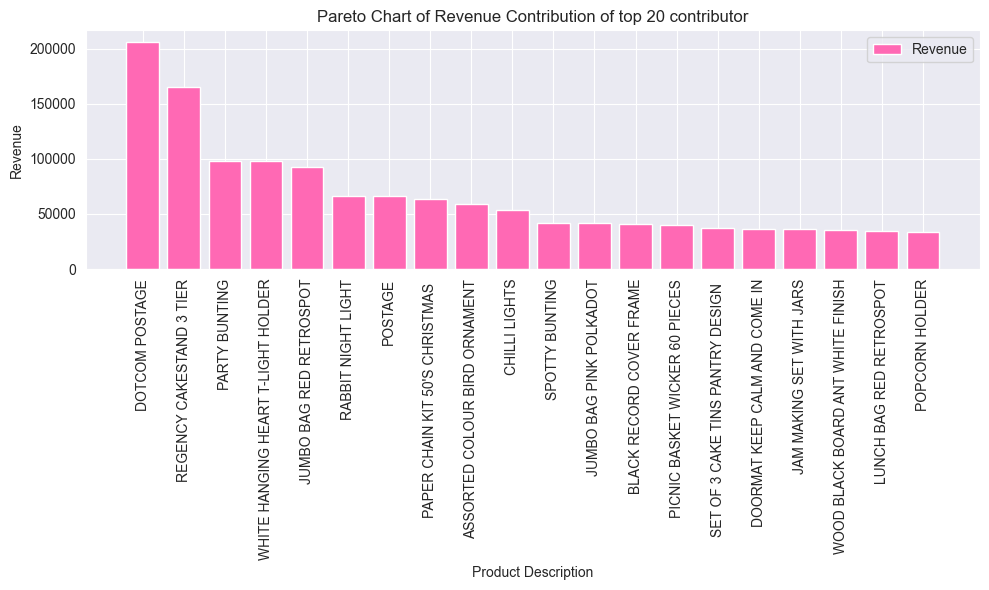

In [108]:
#Plot Pareto Chart
plt.figure(figsize=(10,6))
plt.bar(top_20_contributors['Description'], top_20_contributors['Revenue'], color='hotpink', label='Revenue')
#plt.plot(top_20_contributors['Description'], top_20_contributors['Cumulative %'], color='blue', marker = 'o', label='Cumulative %')
plt.title('Pareto Chart of Revenue Contribution of top 20 contributor')
plt.xlabel('Product Description')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1200x900 with 0 Axes>

([<matplotlib.patches.Wedge at 0x217715bfed0>,
 [Text(-0.5087429085456107, 0.9752849086316022, 'DOTCOM POSTAGE'),
  Text(-1.0722522017227916, 0.24551011364224082, 'REGENCY CAKESTAND 3 TIER'),
  Text(-1.0181600688053503, -0.4163533046467684, 'PARTY BUNTING'),
  Text(-0.7299862174704593, -0.8228730900346489, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(-0.30668733131440007, -1.0563819767542664, 'JUMBO BAG RED RETROSPOT'),
  Text(0.09708821213317169, -1.0957070224584602, 'RABBIT NIGHT LIGHT'),
  Text(0.4267393680624855, -1.0138508330842515, 'POSTAGE'),
  Text(0.7099118252643863, -0.8402530573284381, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(0.9182232289296987, -0.605694726618879, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(1.0440458825370198, -0.3463642521356605, 'CHILLI LIGHTS'),
  Text(1.0948379471558438, -0.106441859564636, 'SPOTTY BUNTING'),
  Text(1.0947035103503266, 0.1078156965690643, 'JUMBO BAG PINK POLKADOT'),
  Text(1.0541192021258827, 0.3143766971476936, 'BLACK RECORD COVER FRAM

Text(0.5, 1.0, 'Revenue Contribution of Top 20 Products')

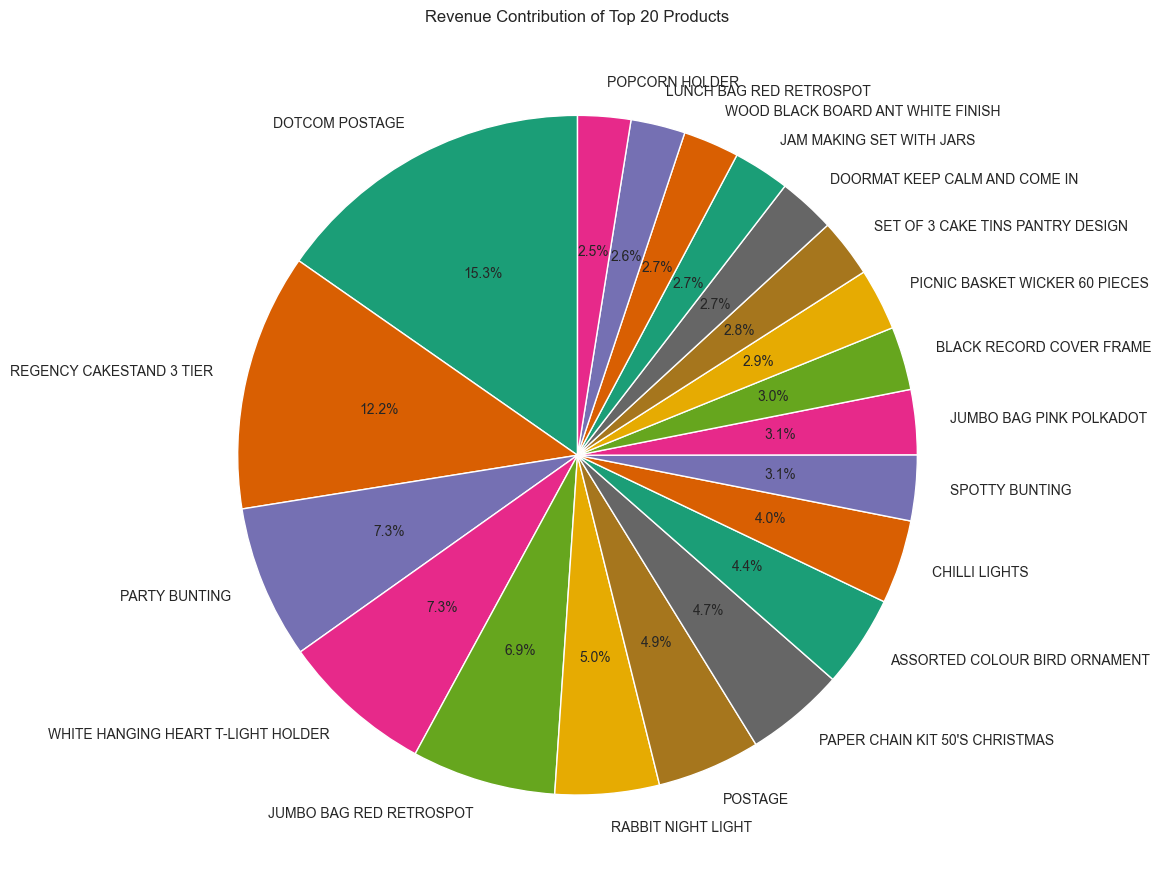

In [142]:
import matplotlib.pyplot as plt

# Create the pie chart
plt.figure(figsize=(12, 9))

# Plot pie chart with the revenue as slices
plt.pie(top_20_contributors['Revenue'], labels=top_20_contributors['Description'], autopct='%1.1f%%', 
        startangle=90, colors = plt.cm.Dark2.colors)

# Title and labels
plt.title('Revenue Contribution of Top 20 Products')
plt.tight_layout()
# Show the plot
plt.show()


<BarContainer object of 20 artists>

Text(0, 10, '15.3%')

Text(0, 10, '27.5%')

Text(0, 10, '34.8%')

Text(0, 10, '42.1%')

Text(0, 10, '48.9%')

Text(0, 10, '53.9%')

Text(0, 10, '58.8%')

Text(0, 10, '63.5%')

Text(0, 10, '67.9%')

Text(0, 10, '71.9%')

Text(0, 10, '75.0%')

Text(0, 10, '78.1%')

Text(0, 10, '81.1%')

Text(0, 10, '84.1%')

Text(0, 10, '86.8%')

Text(0, 10, '89.5%')

Text(0, 10, '92.2%')

Text(0, 10, '94.9%')

Text(0, 10, '97.5%')

Text(0, 10, '100.0%')

top_20_contributors:      StockCode                         Description    Revenue  \
4780       DOT                      DOTCOM POSTAGE  206245.48   
1464     22423            REGENCY CAKESTAND 3 TIER  164762.19   
3045     47566                       PARTY BUNTING   98302.98   
4373    85123A  WHITE HANGING HEART T-LIGHT HOLDER   97715.99   
4360    85099B             JUMBO BAG RED RETROSPOT   92356.03   
2254     23084                  RABBIT NIGHT LIGHT   66756.59   
4783      POST                             POSTAGE   66230.64   
1117     22086     PAPER CHAIN KIT 50'S CHRISTMAS    63791.94   
3291     84879       ASSORTED COLOUR BIRD ORNAMENT   58959.73   
3128     79321                       CHILLI LIGHTS   53768.06   
2541     23298                      SPOTTY BUNTING   42065.32   
1431     22386             JUMBO BAG PINK POLKADOT   41619.66   
376      21137            BLACK RECORD COVER FRAME   40596.96   
1553     22502      PICNIC BASKET WICKER 60 PIECES   39619.50   
1800

Text(0.5, 1.0, 'Pareto Chart of Revenue Contribution of Top 20 Contributors')

Text(0.5, 0, 'Product Description')

Text(0, 0.5, 'Revenue')

Text(0, 0.5, 'Cumulative %')

[]

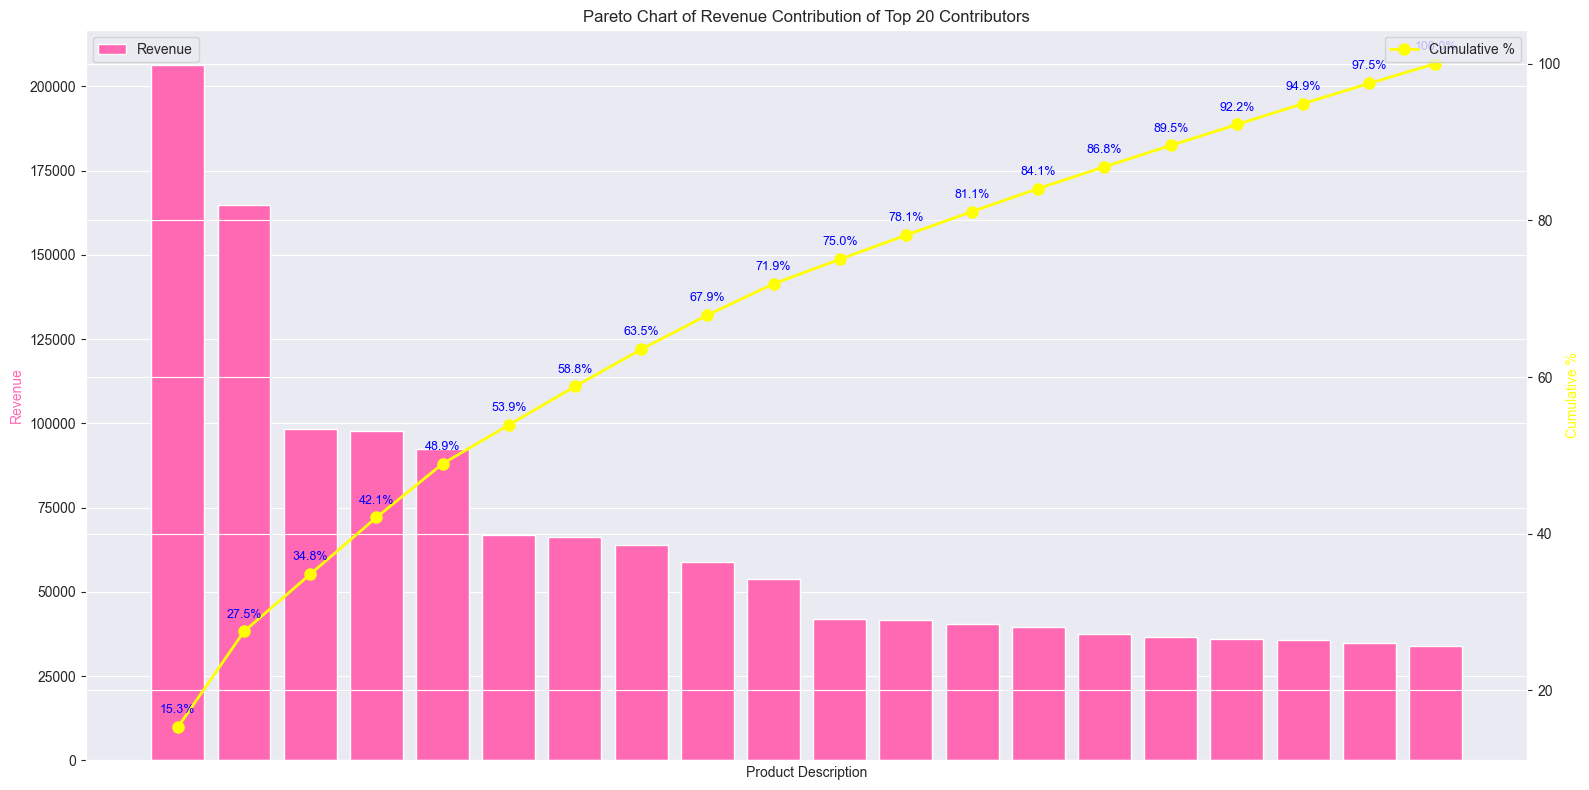

In [121]:

#Revenue percentage per product using bar graph

# Create subplots with two axes
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot the revenue as bars on ax1
ax1.bar(top_20_contributors['Description'], top_20_contributors['Revenue'], color='hotpink', label='Revenue')

# Plot the cumulative percentage on ax2 (second y-axis)
ax2 = ax1.twinx()
ax2.plot(top_20_contributors['Description'], top_20_contributors['Cumulative %'], color='yellow', marker='o', linestyle='solid', linewidth=2, markersize=8, label='Cumulative %')

# Labeling the cumulative percentage on the plot
for i, txt in enumerate(top_20_contributors['Cumulative %']):
    ax2.annotate(f'{txt:.1f}%', (top_20_contributors['Description'].iloc[i], top_20_contributors['Cumulative %'].iloc[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')
print('top_20_contributors:', top_20_contributors)
# Title and labels
ax1.set_title('Pareto Chart of Revenue Contribution of Top 20 Contributors')
ax1.set_xlabel('Product Description')
ax1.set_ylabel('Revenue', color='hotpink')
ax2.set_ylabel('Cumulative %', color='yellow')

# # Remove x-axis labels from the bottom and move them to the top
# ax1.xaxis.set_label_position('top')
# ax1.tick_params(axis='x', which='both', top=True, bottom=False)

# Remove x-axis labels
ax2.set_xticks([])

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Description'>

Text(0.5, 1.0, 'Revenue Contribution Heatmap of Top 20 Products')

Text(0.5, 36.72222222222221, 'Product')

Text(70.7222222222222, 0.5, 'Revenue')

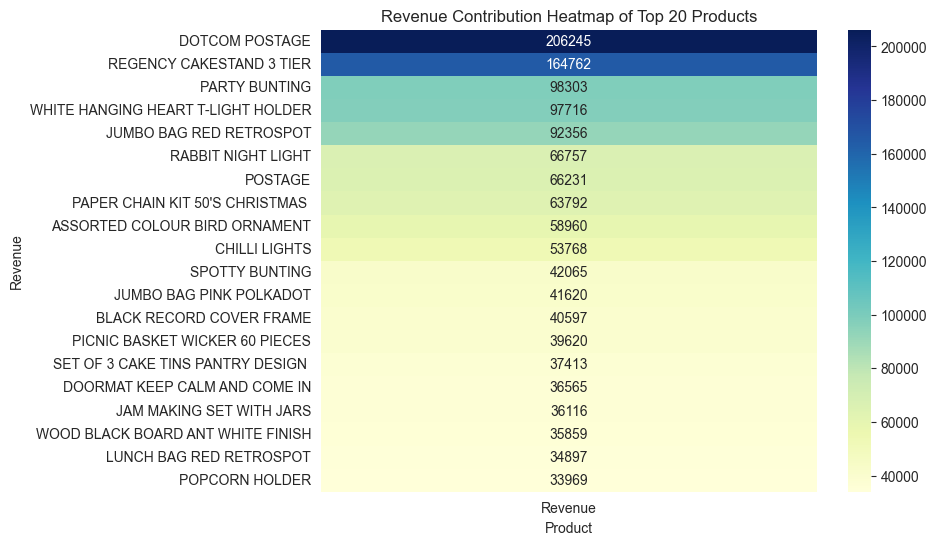

In [47]:
#heatmap 

# Step 1: Create a pivot table if needed (for row/column organization)
# If data is already in a 2D format, this step can be skipped
pareto_pivot = top_20_contributors
# Step 2: Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pareto_pivot.set_index('Description')['Revenue'].to_frame(), annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Revenue Contribution Heatmap of Top 20 Products")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()


 ## Product Segmentation 
 ### based on sales volume, revenue, and daily sales trends using clustering techniques (K-Means)

In [48]:
# Aggregate Sales Data by Product

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate data by product
product_sales = df.groupby(['StockCode', 'Description']).agg(
    total_quantity=('Quantity', 'sum'),
    total_revenue=('Revenue', 'sum'),
    daily_sales=('InvoiceDate', lambda x: x.nunique())  # Count of unique days the product was sold
).reset_index()

# Display the first few rows of the aggregated data
print(product_sales.head())


  StockCode                  Description  total_quantity  total_revenue  \
0     10002  INFLATABLE POLITICAL GLOBE              860         759.89   
1     10080     GROOVY CACTUS INFLATABLE             303         119.09   
2     10080                        check              22           0.00   
3     10120                 DOGGY RUBBER             193          40.53   
4     10125      MINI FUNKY DESIGN TAPES            1296         994.84   

   daily_sales  
0           71  
1           22  
2            1  
3           29  
4           91  


In [49]:
#Prepare Data for Clustering

# Select features for clustering
features = product_sales[['total_quantity', 'total_revenue', 'daily_sales']]

# Standardize the data (optional but recommended for K-Means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Display the standardized features
print(features_scaled[:5])


[[-0.08035409 -0.17497068 -0.21514204]
 [-0.28099849 -0.26295849 -0.48496505]
 [-0.38222125 -0.27931066 -0.60060348]
 [-0.32062306 -0.27374551 -0.4464189 ]
 [ 0.07670329 -0.14270985 -0.1050102 ]]


In [50]:
# Apply K-Means clustering

kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters
product_sales['Cluster'] = kmeans.fit_predict(features_scaled)

# Display the first few rows with the cluster assignments
print(product_sales.head())


  StockCode                  Description  total_quantity  total_revenue  \
0     10002  INFLATABLE POLITICAL GLOBE              860         759.89   
1     10080     GROOVY CACTUS INFLATABLE             303         119.09   
2     10080                        check              22           0.00   
3     10120                 DOGGY RUBBER             193          40.53   
4     10125      MINI FUNKY DESIGN TAPES            1296         994.84   

   daily_sales  Cluster  
0           71        2  
1           22        2  
2            1        2  
3           29        2  
4           91        2  


In [51]:
# Analyze the Segments

# Group products by cluster and calculate mean statistics for each cluster
cluster_summary = product_sales.groupby('Cluster').agg(
    avg_quantity=('total_quantity', 'mean'),
    avg_revenue=('total_revenue', 'mean'),
    avg_daily_sales=('daily_sales', 'mean')
).reset_index()

# Display the summary of each cluster
print(cluster_summary)



   Cluster  avg_quantity   avg_revenue  avg_daily_sales
0        0   2928.322459   5298.660916       298.764115
1        1  10385.723404  19693.777660       779.851064
2        2    277.248504    476.290527        42.760864
3        3  29666.636364  83409.821818      1368.272727


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Product Segmentation: Total Quantity vs Total Revenue')

Text(0.5, 0, 'Total Quantity')

Text(0, 0.5, 'Total Revenue')

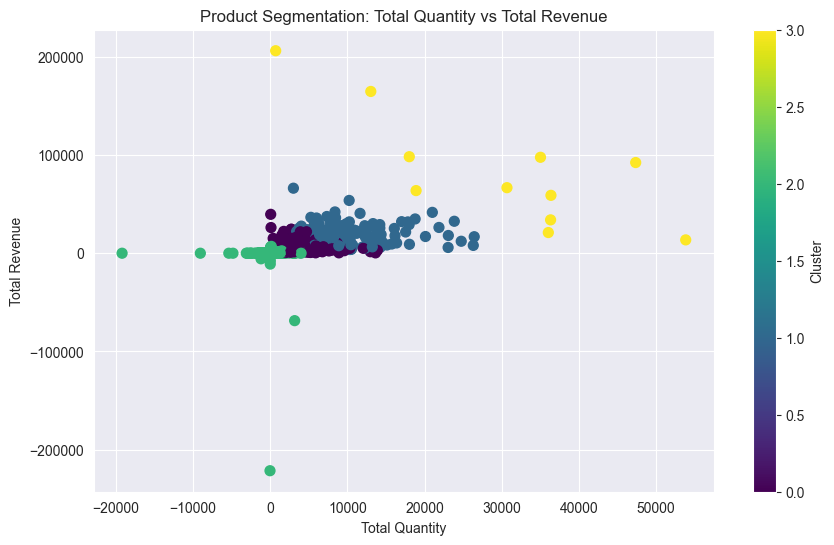

In [145]:
#Visualize the Clusters

# Visualize clusters using a 2D scatter plot (e.g., total quantity vs total revenue)
plt.figure(figsize=(10, 6))
plt.scatter(product_sales['total_quantity'], product_sales['total_revenue'], c=product_sales['Cluster'], cmap='viridis', s=50)
plt.title('Product Segmentation: Total Quantity vs Total Revenue')
plt.xlabel('Total Quantity')
plt.ylabel('Total Revenue')
plt.colorbar(label='Cluster')
plt.show()


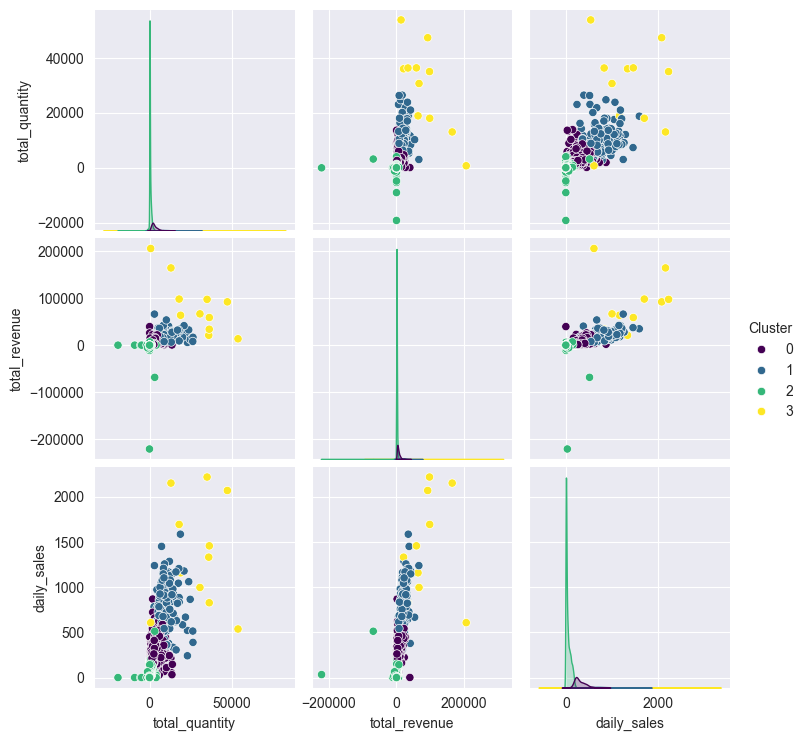

In [151]:
import seaborn as sns

# Assuming 'product_sales' has columns: total_quantity, total_revenue, and Cluster
sns.pairplot(product_sales, hue='Cluster', palette='viridis')
plt.show()
